In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [119]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                  transform=transforms.Compose([
                      transforms.ToTensor()
                  ])),
    batch_size=3,
    shuffle=True
)

In [120]:
train_loader_iter = iter(train_loader)
image_batch, value_batch = train_loader_iter.next()

In [121]:
# 훈련 데이터 설정하기
train_data = []
for i in range(image_batch.shape[0]-1):
    train_data.append(image_batch[i][0].view(-1))
train_data = torch.stack(train_data)
train_data = torch.where(train_data > 0.5, torch.tensor(1.), torch.tensor(-1.))

In [122]:
# W 학습하기
num_states = 28*28
W = torch.zeros([num_states, num_states])
for i in range(num_states):
    for j in range(i):
        W[i, j] = 2*(train_data[:, i]*train_data[:, j]).mean()
W = (W + W.transpose(1, 0))/2        

In [123]:
theta = torch.zeros(num_states)

In [136]:
image, value = image_batch[2][0], value_batch[0]

tensor(-256.3676)


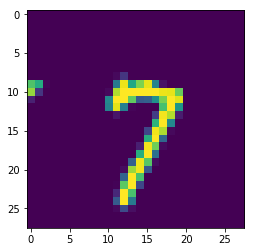

In [137]:
#s = torch.where(torch.randn(num_states) > 1, torch.tensor(1.), -torch.tensor(1.))
s = image.clone().view(-1)
E = -0.5*s@W@s+theta@s; print(E)
plt.imshow(s.view(-1, 28))
plt.show()

In [138]:
# sample 데이터 테스트
num_epoch = 10
for _ in range(num_epoch):
    indices_shuffled = np.random.choice(num_states, num_states, replace=False)
    #indices_shuffled = np.random.choice(num_states, 1, replace=False)
    for idx in indices_shuffled:
        s[idx] = torch.where(W[idx]@s > theta[idx], torch.tensor(1.), torch.tensor(-1.))
E = -0.5*s@W@s+theta@s; print(E)

tensor(-216273.)


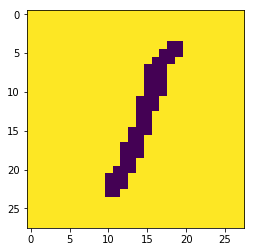

In [139]:
# 테스트 결과
plt.imshow(s.view(-1, 28))
plt.show()